In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout, Flatten, Dense, MaxPool2D, GlobalAveragePooling2D, ZeroPadding2D, AveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn import metrics

print(tf.__version__)

2.6.4


## Preprocessing

In [2]:
train_dir = "../input/pokemonimagedataset/dataset/train"
test_dir = "../input/pokemonimagedataset/dataset/test"
allll=os.listdir(train_dir)
print(allll)

'''
train_dir = "../input/pokemon-images-first-generation17000-files/pokemon"
allll=os.listdir(base_dir)
print(allll)'''

['Golbat', 'Beedrill', 'AlakazamMega Alakazam', 'Caterpie', 'Clefable', 'Raichu', 'Sandslash', 'Metapod', 'Drowzee', 'Oddish', 'Charizard', 'AerodactylMega Aerodactyl', 'Tauros', 'Ponyta', 'Primeape', 'Spearow', 'Mankey', 'Poliwag', 'Krabby', 'Rattata', 'PidgeotMega Pidgeot', 'Tentacruel', 'Graveler', 'Koffing', 'VenusaurMega Venusaur', 'Zapdos', 'Articuno', 'Psyduck', 'Bellsprout', 'Lapras', 'Butterfree', 'Weezing', 'Abra', 'Muk', 'Cloyster', 'Porygon', 'Flareon', 'Jigglypuff', 'Raticate', 'GengarMega Gengar', 'Venusaur', 'Dewgong', 'Horsea', 'Rhydon', 'Omanyte', 'Exeggcute', 'CharizardMega Charizard Y', 'NidoranF', 'Kabuto', 'Ditto', 'Growlithe', 'Mew', 'Electrode', 'Vileplume', 'Seaking', 'Exeggutor', 'Electabuzz', 'KangaskhanMega Kangaskhan', 'Chansey', 'Magmar', 'Haunter', 'Ninetales', 'Clefairy', 'Gyarados', 'Tangela', 'Marowak', 'MewtwoMega Mewtwo Y', 'Snorlax', 'Nidoqueen', 'Hitmonchan', 'Ekans', 'Sandshrew', 'Jolteon', 'Kabutops', 'Lickitung', 'Pidgeotto', 'Shellder', 'Slowpok

'\ntrain_dir = "../input/pokemon-images-first-generation17000-files/pokemon"\nallll=os.listdir(base_dir)\nprint(allll)'

In [3]:
n = 0
classes = []
for folder in allll:
    image_count = len(os.listdir(train_dir+"/"+folder))
    if image_count > 223:
        print(folder, ":", image_count, "images")
        classes.append(folder)
        n += 1
print(n, "classes in total")
print(classes)

classes = ['Articuno', 'CharizardMega Charizard Y', 'MewtwoMega Mewtwo Y', 'CharizardMega Charizard X', 'Vaporeon', 'Dragonite']

VenusaurMega Venusaur : 224 images
CharizardMega Charizard Y : 229 images
MewtwoMega Mewtwo Y : 228 images
CharizardMega Charizard X : 228 images
Vaporeon : 224 images
Dragonite : 224 images
6 classes in total
['VenusaurMega Venusaur', 'CharizardMega Charizard Y', 'MewtwoMega Mewtwo Y', 'CharizardMega Charizard X', 'Vaporeon', 'Dragonite']


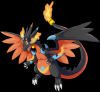

In [4]:
'''
for folder in classes:
    image_list=os.listdir(train_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(train_dir+"/"+folder+"/"+img_name)
        # print(img.size)
'''

# Image sample
image.load_img(train_dir + "/CharizardMega Charizard X/CharizardMega Charizard X.0.png")

In [5]:
# Source: https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy

In [6]:
# Read train data into x and y arrays
x=[]
y=[]
for folder in classes:
    image_list=os.listdir(train_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(train_dir+"/"+folder+"/"+img_name,target_size=(100,100))

        # Converting to arrays
        img=image.img_to_array(img)

        x.append(img) # appending image array
        y.append(classes.index(folder)) # appending class index to the array

print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [7]:
# Read train data into x and y arrays
x_test=[]
y_test=[]
for folder in classes:
    image_list=os.listdir(test_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_dir+"/"+folder+"/"+img_name,target_size=(100,100))

        # Converting to arrays
        img=image.img_to_array(img)

        x_test.append(img) # appending image array
        y_test.append(classes.index(folder)) # appending class index to the array

print("Preparing Testing Dataset Completed.")

Preparing Testing Dataset Completed.


In [8]:
# Prepare train and validation datasets
x = np.array(x)
y = to_categorical(y, 6)
print(y.shape)

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.25,random_state=5)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

print('x_val shape:', x_val.shape)
print(x_val.shape[0], 'validation samples')

x_test = np.array(x_test)
y_test = to_categorical(y_test, 6)
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')
print(y_test.shape)


(1351, 6)
x_train shape: (1013, 100, 100, 3)
1013 train samples
x_val shape: (338, 100, 100, 3)
338 validation samples
x_test shape: (285, 100, 100, 3)
285 test samples
(285, 6)


## Training - CNN

### ResNet
https://www.freesion.com/article/8131643044/

In [9]:
from tensorflow.keras.initializers import glorot_uniform
def identity_block(X,f,filters,stage,block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
# 我认为相当于tensorflow里的一个占位符，之后主体model里输入filters
    F1,F2,F3 = filters
    X_shortcut = X

# First
    X = Conv2D(filters=F1,kernel_size=(1,1),strides=(1,1),padding='valid',
               name=conv_name_base+'2a',kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)

# 这里的f也相当于一个占位符，之后输入值
# Second
    X = Conv2D(filters=F2,kernel_size=(f,f),strides=(1,1),padding='same',
               name=conv_name_base+'2b',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

# Final
    X = Conv2D(filters=F3,kernel_size=(1,1),strides=(1,1),padding='valid',
               name=conv_name_base+'2c',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2c')(X)

    X = keras.layers.Add()([X,X_shortcut])
    X = Activation('relu')(X)

    return X

def convolutional_block(X,f,filters,stage,block,s=2):
    conv_name_base = 'res' + str(stage) + block +'_branch'
    bn_name_base = 'bn' + str(stage) + block +'_branch'

    F1,F2,F3 = filters
    X_shortcut = X

# First
    X = Conv2D(F1,(1,1),strides=(s,s),name=conv_name_base+'2a',padding='valid',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)


#  Second
    X = Conv2D(F2,(f,f),strides=(1,1),name=conv_name_base+'2b',padding='same',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

#  Third
    X = Conv2D(F3,(1,1),strides=(1,1),name=conv_name_base+'2c',padding='valid',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2c')(X)

#   X_shortcut path
    X_shortcut = Conv2D(F3,(1,1),strides=(s,s),name=conv_name_base+'1',padding='valid',
                        kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3,name=bn_name_base+'1')(X_shortcut)

#   ADD
    X = keras.layers.Add()([X,X_shortcut])
    X = Activation('relu')(X)

    return X

def ResNet50(input_shape=(64,64,3),classes=6):
#   定义输入层的输入形状
    X_input = keras.layers.Input(input_shape)

#  padding-zero
    X = ZeroPadding2D((3,3))(X_input)

#  stage 1
    X = Conv2D(filters=64,kernel_size=(7,7),strides=(2,2),name='conv',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPool2D(pool_size=(3,3),strides=(2,2))(X)

#  stage 2
    X = convolutional_block(X,f=3,filters=[64,64,256],stage=2,block='a',s=1)
    X = identity_block(X,f=3,filters=[64,64,256],stage=2,block='b')
    X = identity_block(X,f=3,filters=[64,64,256],stage=2,block='c')

#  stage 3
    X = convolutional_block(X,f=3,filters=[128,128,512],stage=3,block='a',s=1)
    X = identity_block(X,f=3,filters=[128,128,512],stage=3,block='b')
    X = identity_block(X,f=3,filters=[128,128,512],stage=3,block='c')
    X = identity_block(X,f=3,filters=[128,128,512],stage=3,block='d')

#  stage 4
    X = convolutional_block(X,f=3,filters=[256,256,1024],stage=4,block='a',s=2)
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block='b')
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block='c')
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block='d')
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block='e')
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block='f')

#  stage 5
    X = convolutional_block(X,f=3,filters=[512,512,2048],stage=5,block='a',s=2)
    X = identity_block(X,f=3,filters=[512,512,2048],stage=5,block='b')
    X = identity_block(X,f=3,filters=[512,512,2048],stage=5,block='c')

    X = AveragePooling2D(pool_size=(2,2),padding='same')(X)

    X = Flatten()(X)
    X = Dense(classes,activation='softmax',name='fc'+str(classes),
              kernel_initializer=glorot_uniform(seed=0))(X)

    model = Model(inputs=X_input,outputs=X,name='ResNet50')

    return model


modelR = ResNet50(input_shape=(100,100,3))
modelR.summary()

2022-08-28 03:59:51.732079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 03:59:51.740604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 03:59:51.741302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 03:59:51.742557: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv (Conv2D)                   (None, 50, 50, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv[0][0]                       
___________________________________________________________________________________________

In [10]:
BATCH_SIZE = 32
image_count = 1017
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

# Train ResNet
modelR.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
historyR = modelR.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), batch_size = BATCH_SIZE, steps_per_epoch=STEPS_PER_EPOCH, epochs=35)

2022-08-28 03:59:54.188950: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/35


2022-08-28 03:59:59.902365: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


32/32 [==============================] - 17s 168ms/step - loss: 7.9302 - accuracy: 0.1767 - val_loss: 366297.8750 - val_accuracy: 0.1805
Epoch 2/35
32/32 [==============================] - 4s 114ms/step - loss: 4.2467 - accuracy: 0.2646 - val_loss: 284039.3438 - val_accuracy: 0.1686
Epoch 3/35
32/32 [==============================] - 4s 115ms/step - loss: 3.4821 - accuracy: 0.3583 - val_loss: 1052.7462 - val_accuracy: 0.1657
Epoch 4/35
32/32 [==============================] - 4s 114ms/step - loss: 3.3526 - accuracy: 0.4314 - val_loss: 15.0922 - val_accuracy: 0.1923
Epoch 5/35
32/32 [==============================] - 4s 116ms/step - loss: 2.9141 - accuracy: 0.4640 - val_loss: 2.6737 - val_accuracy: 0.2101
Epoch 6/35
32/32 [==============================] - 4s 115ms/step - loss: 3.0095 - accuracy: 0.4304 - val_loss: 1.6313 - val_accuracy: 0.3521
Epoch 7/35
32/32 [==============================] - 4s 114ms/step - loss: 2.3067 - accuracy: 0.4768 - val_loss: 2.2818 - val_accuracy: 0.2722
Ep

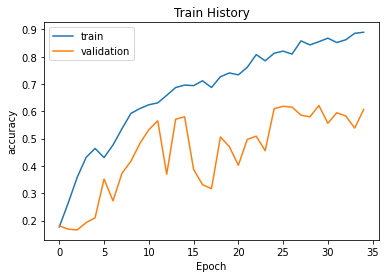

In [11]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

show_train_history(historyR,'accuracy','val_accuracy')

In [12]:
# Test and Evaluate ResNet

# Test
scores = modelR.evaluate(x_test,y_test)
print(scores[1])

# Evalute
predictionR = modelR.predict(x_test)

def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in predictionR:
    labels = roundoff(labels)

# Confusion matrix
classes = np.array(classes)
print(metrics.classification_report(y_test, predictionR, target_names=classes))

9/9 [==============================] - 0s 55ms/step - loss: 0.9712 - accuracy: 0.6596
0.659649133682251
                           precision    recall  f1-score   support

                 Articuno       0.79      0.84      0.81        44
CharizardMega Charizard Y       0.29      0.24      0.27        45
      MewtwoMega Mewtwo Y       0.77      0.77      0.77        48
CharizardMega Charizard X       0.38      0.47      0.42        53
                 Vaporeon       0.86      0.77      0.81        47
                Dragonite       0.95      0.88      0.91        48

                micro avg       0.66      0.66      0.66       285
                macro avg       0.67      0.66      0.67       285
             weighted avg       0.67      0.66      0.66       285
              samples avg       0.66      0.66      0.66       285



### AlexNet

In [13]:
# Uses AlexNet Neutral Network Architecture

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))

model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu'))

model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu'))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))

model.add(Flatten()) # [1,2,3,4]
        
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
        
model.add(Dense(6, activation='softmax'))

In [14]:
# Train AlexNet

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), batch_size = BATCH_SIZE, steps_per_epoch=STEPS_PER_EPOCH, epochs=35)

Epoch 1/35
32/32 [==============================] - 4s 81ms/step - loss: 4.5843 - accuracy: 0.1500 - val_loss: 1.7992 - val_accuracy: 0.1391
Epoch 2/35
32/32 [==============================] - 2s 48ms/step - loss: 1.7922 - accuracy: 0.1718 - val_loss: 1.7979 - val_accuracy: 0.1391
Epoch 3/35
32/32 [==============================] - 2s 49ms/step - loss: 1.7921 - accuracy: 0.1619 - val_loss: 1.7960 - val_accuracy: 0.1598
Epoch 4/35
32/32 [==============================] - 2s 48ms/step - loss: 1.7915 - accuracy: 0.1777 - val_loss: 1.7971 - val_accuracy: 0.1391
Epoch 5/35
32/32 [==============================] - 2s 50ms/step - loss: 1.7928 - accuracy: 0.1718 - val_loss: 1.7975 - val_accuracy: 0.1598
Epoch 6/35
32/32 [==============================] - 2s 48ms/step - loss: 1.7917 - accuracy: 0.1491 - val_loss: 1.7956 - val_accuracy: 0.1598
Epoch 7/35
32/32 [==============================] - 2s 48ms/step - loss: 1.7916 - accuracy: 0.1757 - val_loss: 1.7956 - val_accuracy: 0.1598
Epoch 8/35
32

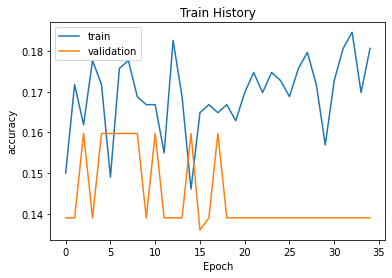

In [15]:
show_train_history(history,'accuracy','val_accuracy')

In [16]:
# Test and Evaluate AlexNet

# Test
scores = model.evaluate(x_test,y_test)
print(scores[1])

# Evalute
prediction = model.predict(x_test)

def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in prediction:
    labels = roundoff(labels)

# Confusion matrix
classes = np.array(classes)
print(metrics.classification_report(y_test, prediction, target_names=classes))

9/9 [==============================] - 1s 67ms/step - loss: 1.7934 - accuracy: 0.1684
0.16842105984687805
                           precision    recall  f1-score   support

                 Articuno       0.00      0.00      0.00        44
CharizardMega Charizard Y       0.00      0.00      0.00        45
      MewtwoMega Mewtwo Y       0.00      0.00      0.00        48
CharizardMega Charizard X       0.00      0.00      0.00        53
                 Vaporeon       0.00      0.00      0.00        47
                Dragonite       0.17      1.00      0.29        48

                micro avg       0.17      0.17      0.17       285
                macro avg       0.03      0.17      0.05       285
             weighted avg       0.03      0.17      0.05       285
              samples avg       0.17      0.17      0.17       285



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
